In [1]:
from compare_HPO_methods_Financial_Tasks import create_scores_dict,normalize_scores,plot_scores_per_task
import json
import pandas as pd
import numpy as np
from joblib import dump, load

In [2]:
#test_scores, log_loss,f1_score = create_scores_dict()
# names = []
# with open(f"task_indices/financial_task_names.json", 'r') as f:
#     _names = json.load(f)
# names.extend(_names)

In [3]:
#scores = [test_scores, log_loss,f1_score]
# # dump(scores,'Final_DATA/Financial_best_Scores.joblib')
# scores = [test_scores, log_loss,f1_score]
#dump(scores,'Final_DATA/Financial_Scores.joblib')

In [4]:
# Shape: scores = [scores,log_loss,f1_score], where scores = [scores_SMAC,scores_random_search, scores_tpe, scores_gp_Bo]
scores = load('Final_DATA/Financial_Scores.joblib') 
scores_best = load('Final_DATA/Financial_best_Scores.joblib')
names = load('Final_DATA/Financial_names.joblib')
type = ['score', 'log loss']


In [5]:
#normalize accuracy score and log loss
norm_scores = []

norm_scores.append(normalize_scores(scores_best[0], adtm = True))
norm_scores.append(normalize_scores(scores_best[1], adtm = False))
  

[125.13731122  91.22164723 391.06349206]


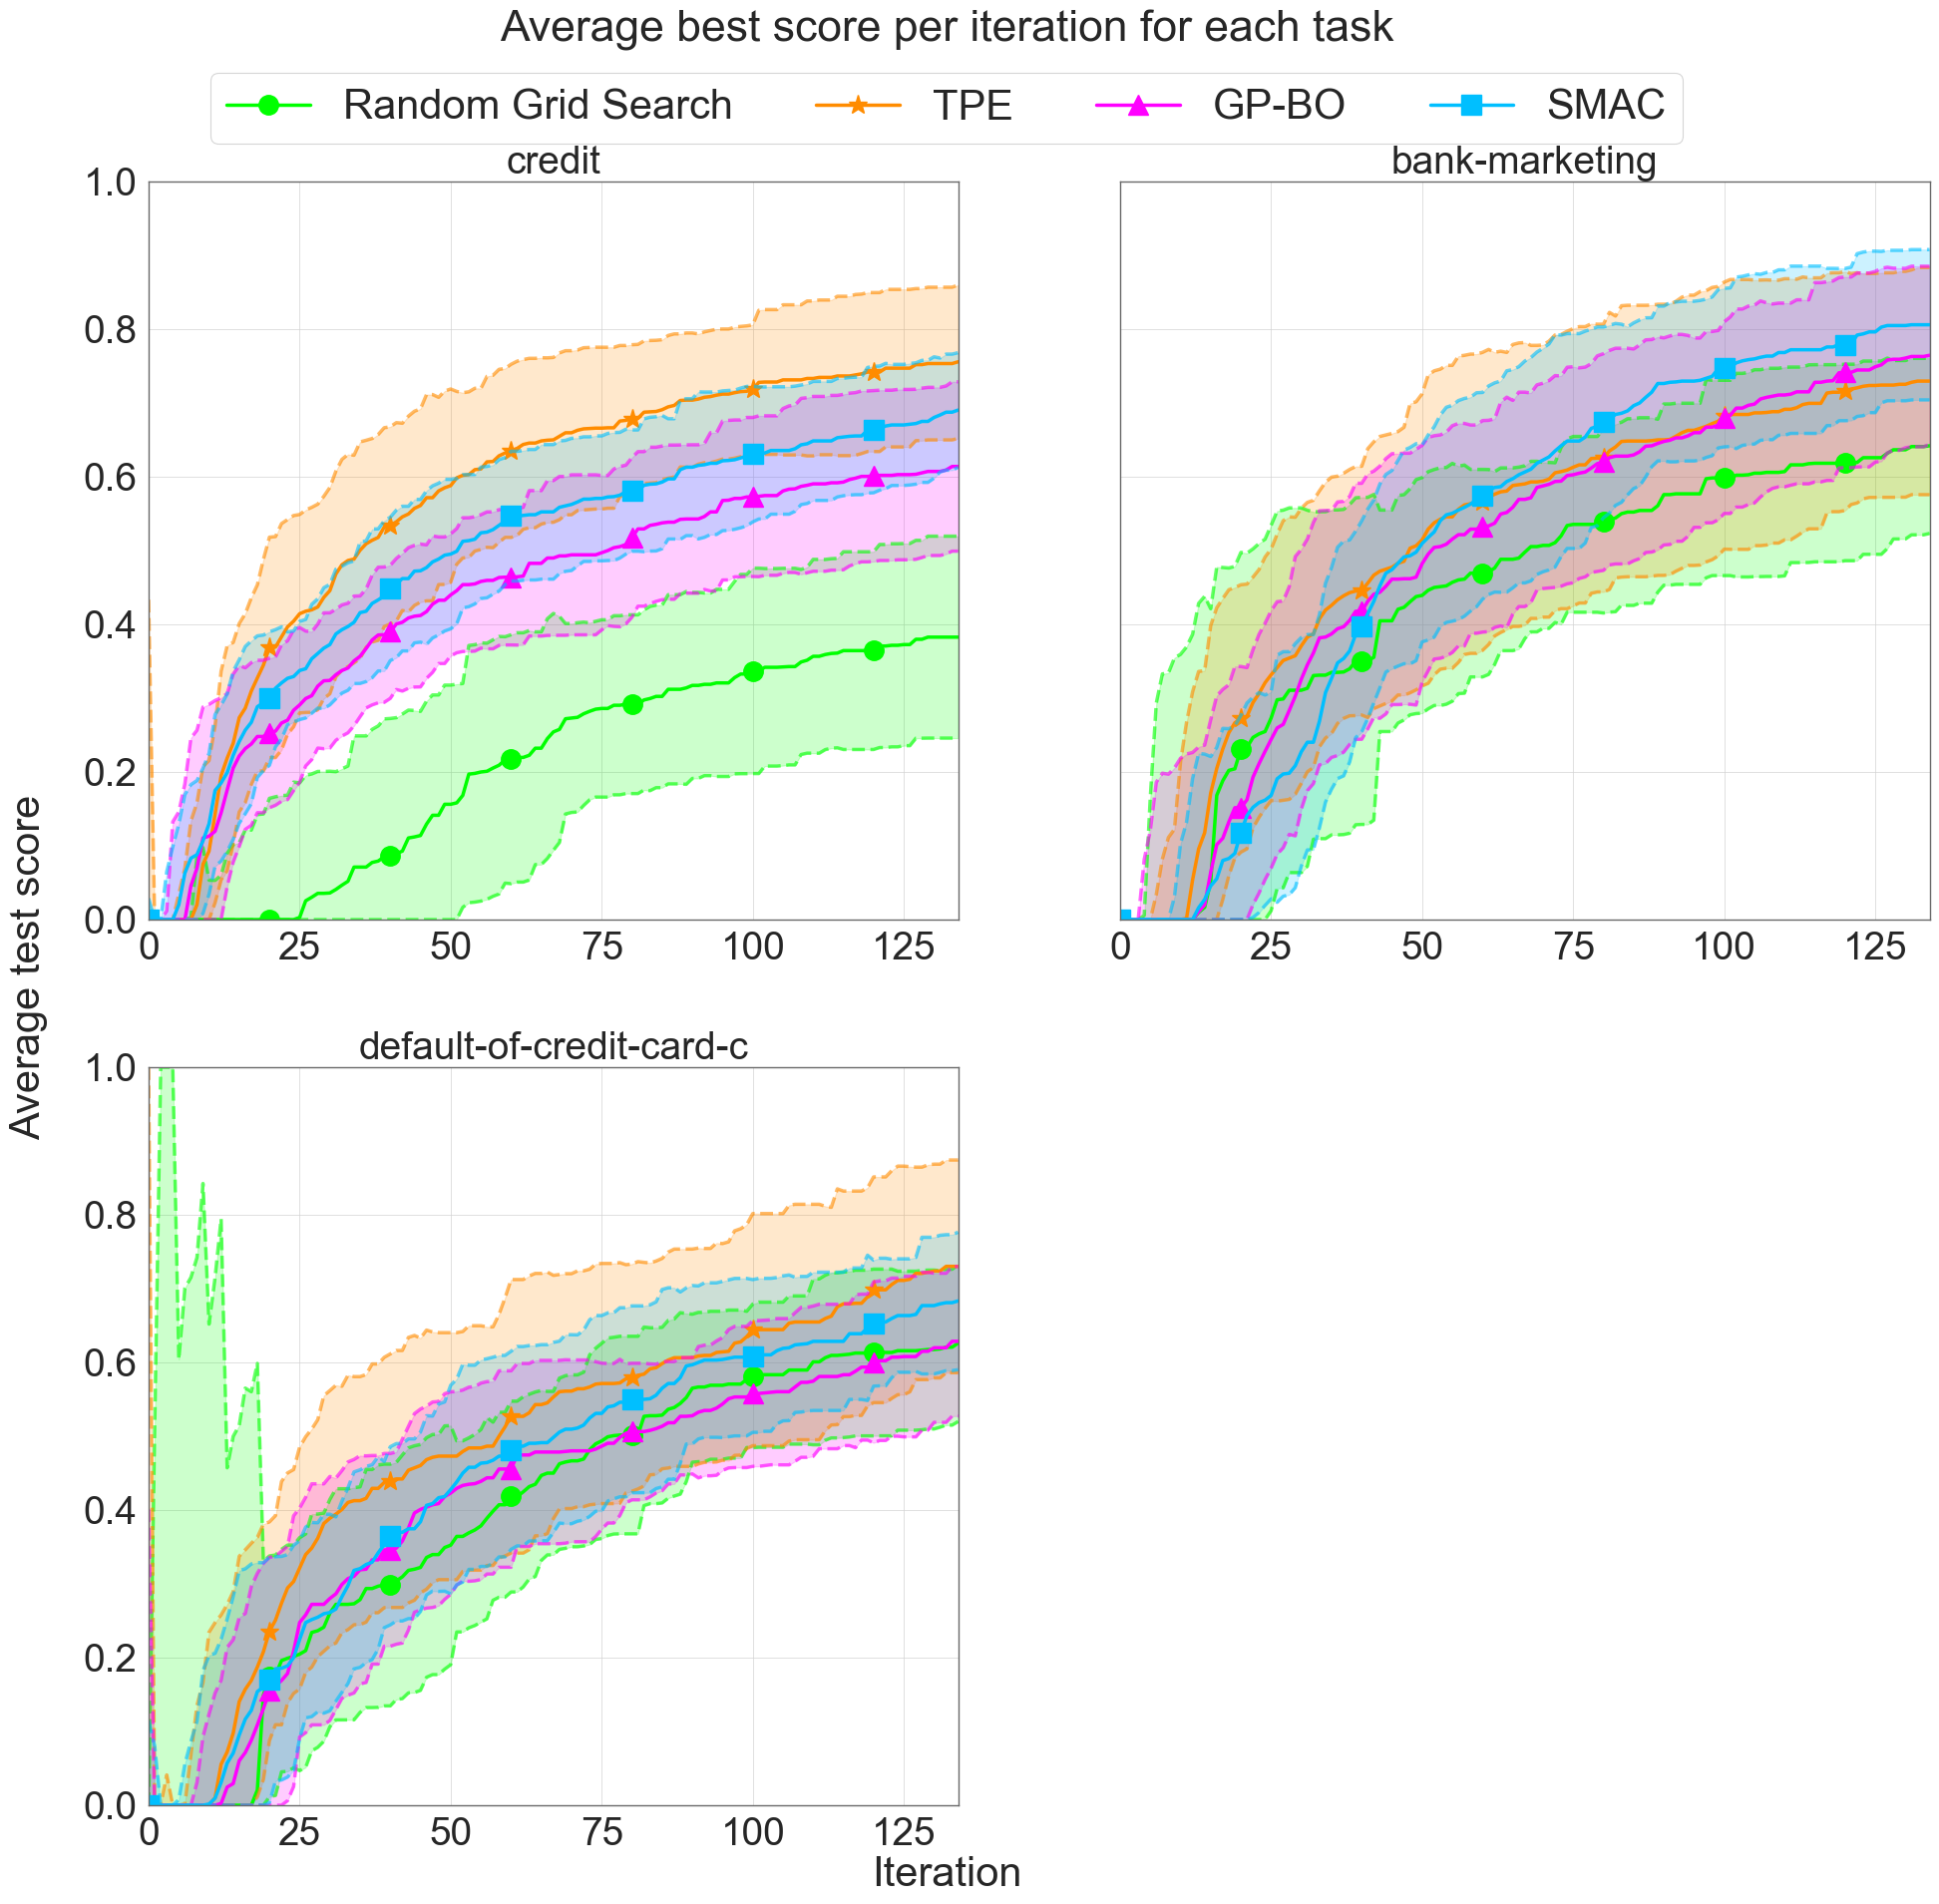

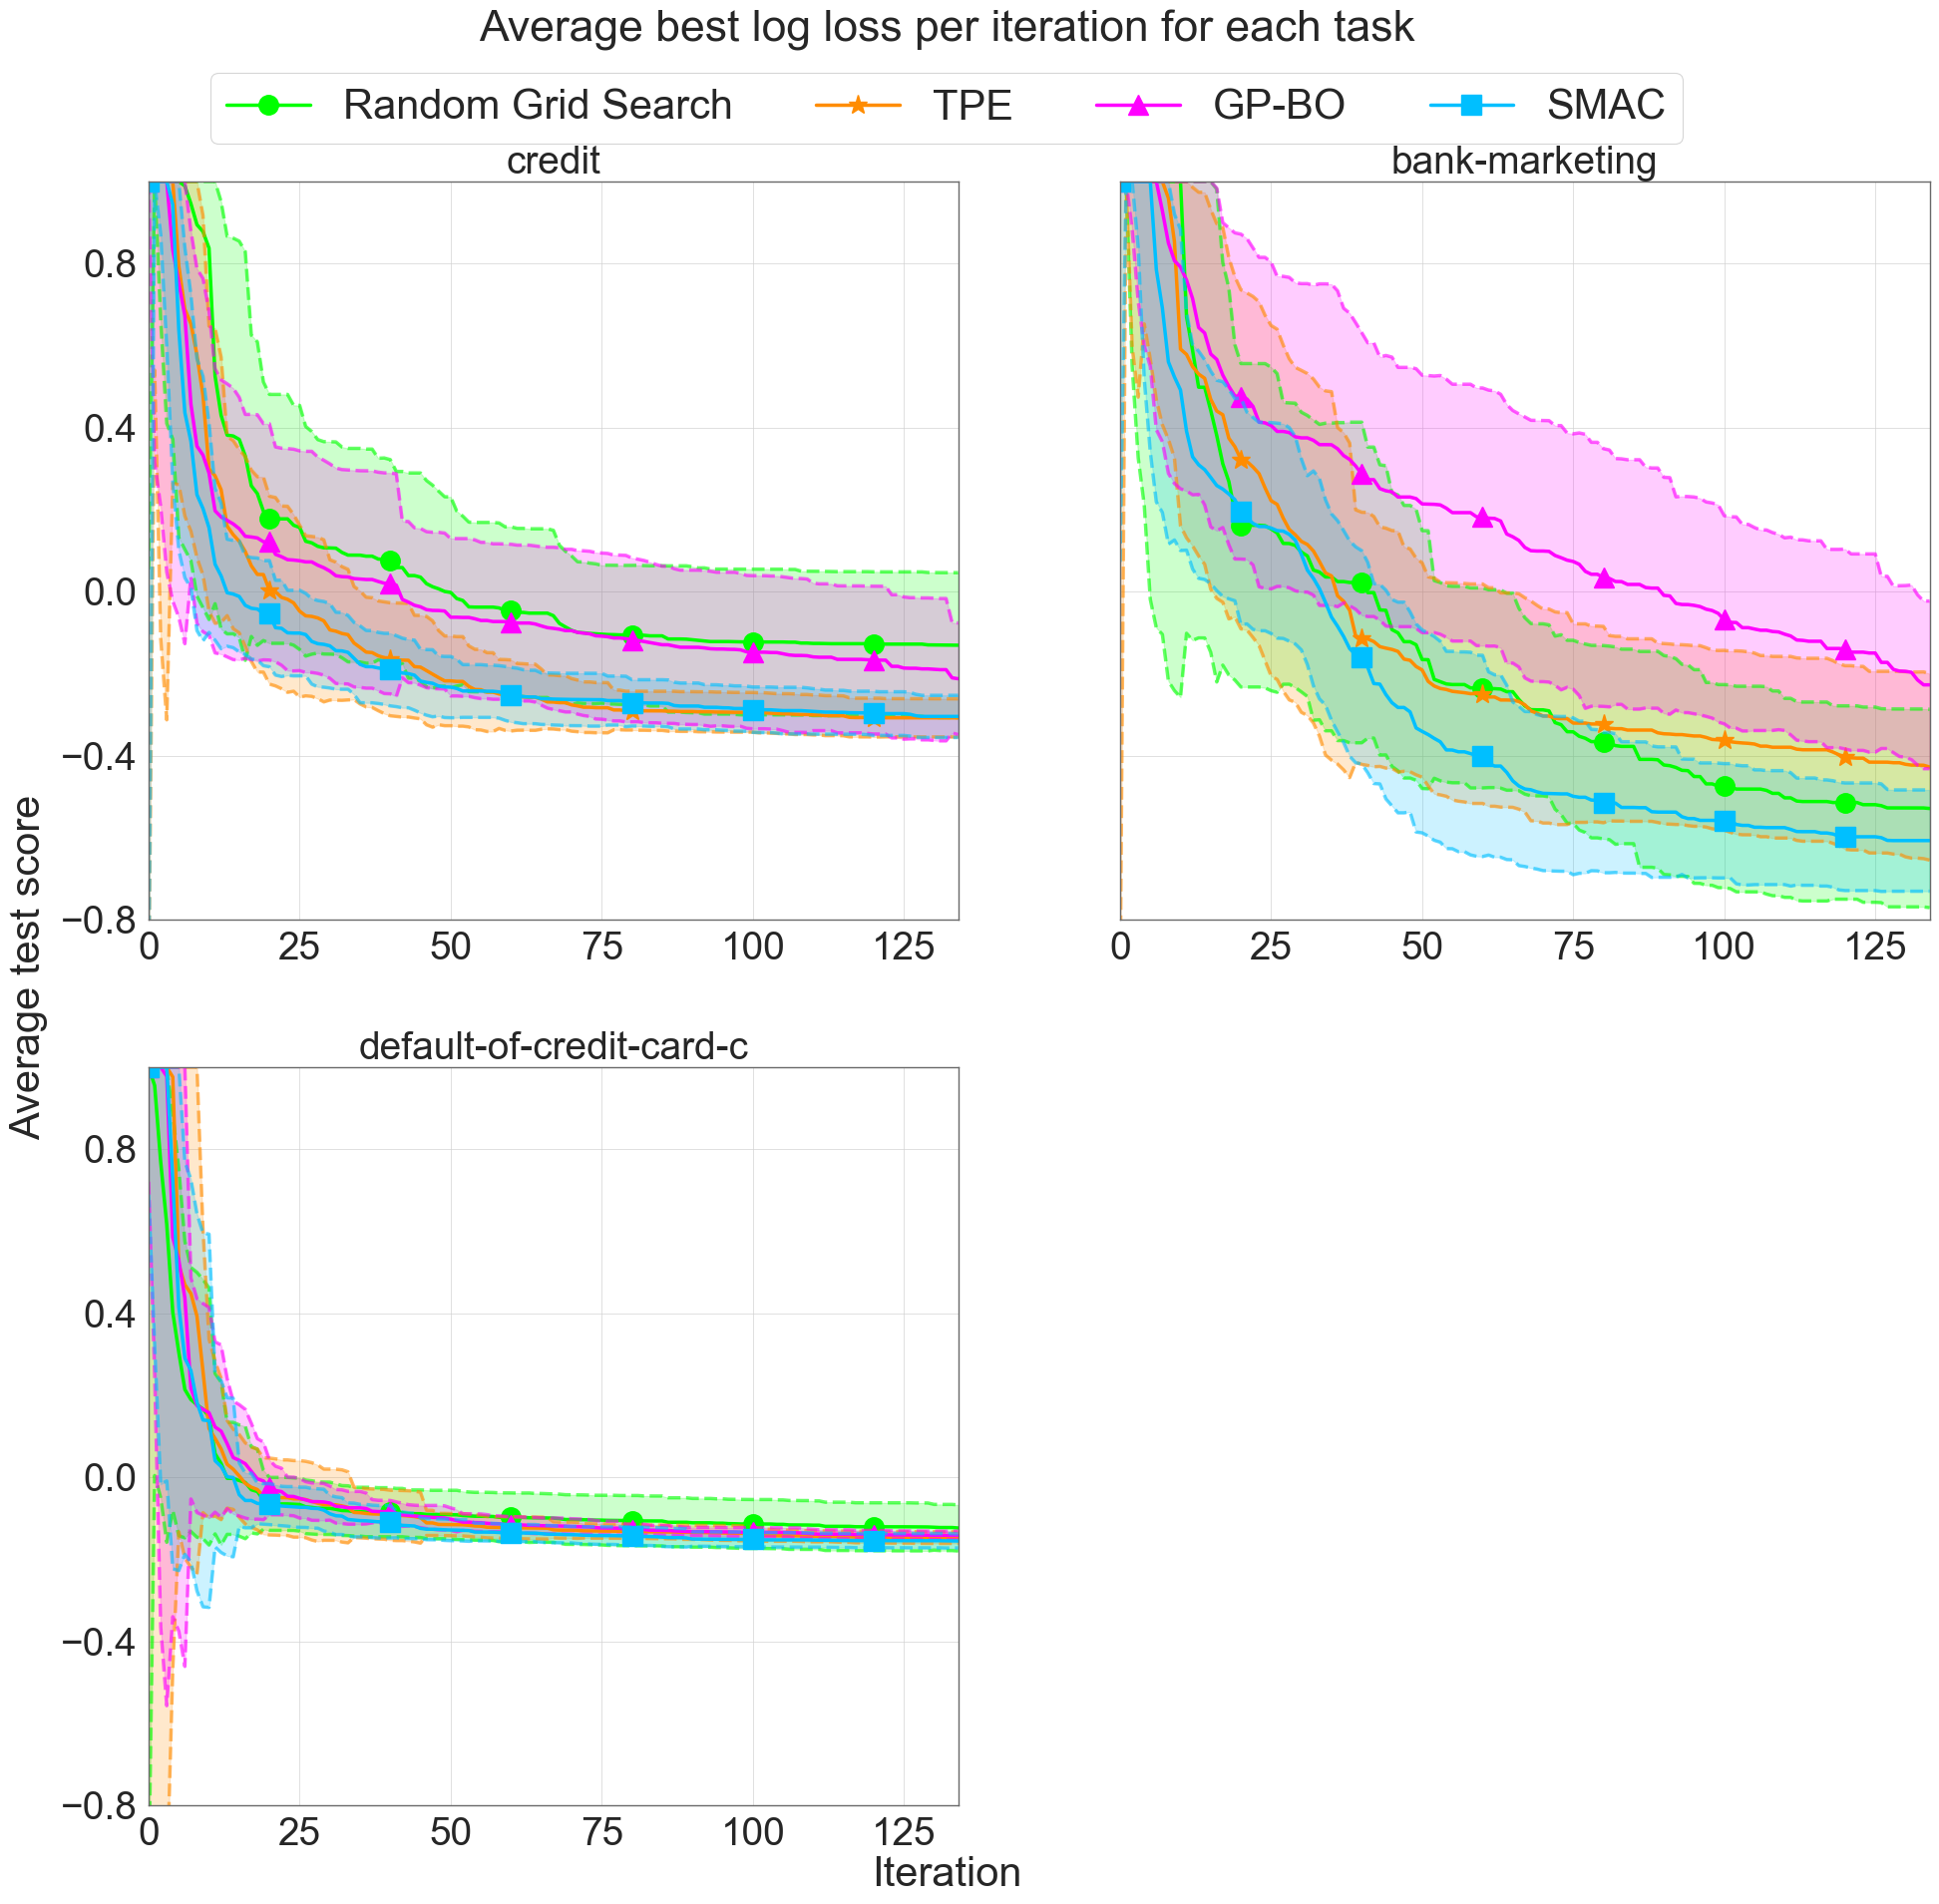

In [6]:
for i in range(len(type)):
     plot_scores_per_task(norm_scores[i],names, type[i],True,True)   

In [11]:
METHOD = ['Random Grid Search', 'TPE','GP-BO','SMAC']
for i in range(4):
    print(f'Best score after 135 iterations averaged over seeds using {METHOD[i]}',np.mean(scores_best[0][i][134,:,:], axis=-1))
    print(f'Average Volatility over all 135 iterations of {METHOD[i]}',np.mean(np.std(scores_best[0][i][:,:,:], axis=-1),axis=0))

Best score after 135 iterations averaged over seeds using Random Grid Search [0.78100959 0.80759102 0.82254833]
Average Volatility over all 135 iterations of Random Grid Search [0.00130407 0.00207424 0.001057  ]
Best score after 135 iterations averaged over seeds using TPE [0.78333098 0.80836149 0.82276667]
Average Volatility over all 135 iterations of TPE [0.00084688 0.00178785 0.00048443]
Best score after 135 iterations averaged over seeds using GP-BO [0.78244849 0.80866884 0.82255333]
Average Volatility over all 135 iterations of GP-BO [0.0007542  0.00152582 0.00034697]
Best score after 135 iterations averaged over seeds using SMAC [0.78292416 0.80903263 0.82266833]
Average Volatility over all 135 iterations of SMAC [0.00067467 0.00127009 0.00036747]


In [8]:
print(scores_best[0][0][0,0,0])

0.7655253803467252
